# Task 3

Build a decision tree classifier to predict whether a customer will purchase a 
product or service based on their demographic and behavioral data. Use a dataset
such as the Bank Marketing dataset from the UCI Machine Learning Repository.

# Importing required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\Ashish\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io

AttributeError: _ARRAY_API not found

# Data loading and Cleaning

In [4]:
# Step 1: Load the dataset
data = pd.read_csv("Data 1.csv")

In [5]:
data.head(10)

,age,job,marital,education,Credit,balance,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration/sec,campaign,pdays,previous,previous marketing campaign,subscribed term deposit
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,October,79 seconds,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,May,220 seconds,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,April,185 seconds,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,June,199 seconds,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,May,226 seconds,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,February,141 seconds,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,May,341 seconds,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,May,151 seconds,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,May,57 seconds,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,April,313 seconds,1,147,2,failure,no


In [6]:
data.describe()

,age,balance,last_contact_day,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,50.000000,871.000000,25.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   age                          4521 non-null   int64 
 1   job                          4521 non-null   object
 2   marital                      4521 non-null   object
 3   education                    4521 non-null   object
 4   Credit                       4521 non-null   object
 5   balance                      4521 non-null   int64 
 6   housing_loan                 4521 non-null   object
 7   personal_loan                4521 non-null   object
 8   contact                      4521 non-null   object
 9   last_contact_day             4521 non-null   int64 
 10  last_contact_month           4521 non-null   object
 11  last_contact_duration/sec    4521 non-null   object
 12  campaign                     4521 non-null   int64 
 13  pdays                        4521

In [8]:
data.isnull().sum()

age                            0
job                            0
marital                        0
education                      0
Credit                         0
balance                        0
housing_loan                   0
personal_loan                  0
contact                        0
last_contact_day               0
last_contact_month             0
last_contact_duration/sec      0
campaign                       0
pdays                          0
previous                       0
previous marketing campaign    0
subscribed term deposit        0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

# Decision Tree Classification

In [10]:
# Step 2: Create DataFrame
df = pd.DataFrame(data)

In [11]:
# Step 3: Clean the last_contact_duration column
df['last_contact_duration/sec'] = df['last_contact_duration/sec'].str.replace(' seconds', '').astype(float)


In [12]:
# Step 4: Encode categorical variables
label_encoders = {}
categorical_cols = [
    'job', 
    'marital', 
    'education', 
    'Credit', 
    'housing_loan', 
    'personal_loan', 
    'contact', 
    'last_contact_month', 
    'previous marketing campaign', 
    'subscribed term deposit'
]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
# Step 5: Define features and target variable
X = df.drop('subscribed term deposit', axis=1)
y = df['subscribed term deposit']


In [14]:
# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Step 7: Train the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Step 8: Evaluate the model
y_pred = classifier.predict(X_test)


In [17]:
# Step 9: Print evaluation results
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



In [18]:
# Step 10: Create DataFrame for the classification report
report_df = pd.DataFrame(report).transpose()

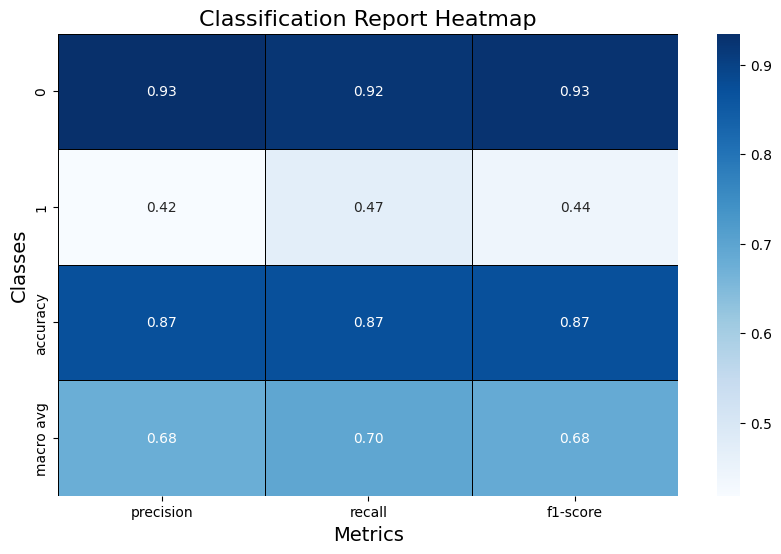

In [19]:
# Step 11: Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", cbar=True, 
            linewidths=0.5, linecolor='black')


# Adding titles and labels
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)

# Step 12: Save the figure
plt.savefig('classification_report_heatmap.png', dpi=300)
plt.show()

# Close the plot
plt.close()